# Image Processing of Forestry Data

### This notebook holds all the Python code used for this project. Methods and algorithms used here are largely derived from the OpenCV Python Tutorial Documentation.

The code below used the Python libary, OpenCV, to create a custom Hue Saturation Value Scaler window.
The scaler takes in an image and allows you to adjust the sliders in real time.

In [6]:
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing  )
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

img = cv2.imread('Trees/58-48_2016.jpg')
output = img
waitTime = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(img,img, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(waitTime) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 18), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 39), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 59), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 64), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 75), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 87), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 95), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 100), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 103), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 111), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 118), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 121), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 125), (hMax = 179 , sMax = 255,

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


# 





The following code attempts to create a mask of the image given the threshold values you found in the HSV scaler above. The program uses active contours to try and draw the proper mask.

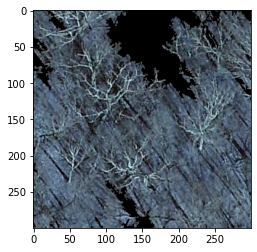

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk


image = cv2.imread('Trees/58-48_2016.jpg')
blank_mask = np.zeros(image.shape, dtype=np.uint8)
original = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# change these values based on HSv threshold range found above
lower = np.array([0, 0, 70])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
for c in cnts:
    cv2.drawContours(blank_mask,[c], -1, (255,255,255), -1)
    break

result = cv2.bitwise_and(original,blank_mask)

cv2.imshow("MASK", result)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(result)

# 




This portion of the code attempts to create a masked image by converting it to a gray scale image, applying a binary threshold, then subtracting them from each other in order to remove the shadows. However, it is not fully working yet.

In [4]:
import cv2
import numpy as np

# load image whose you want to create mask
img = cv2.imread('Trees/58-48_2016.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray,220,220, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# apply guassian blur filter to mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# resize windows
mask=cv2.resize(mask,(400,400))
img=cv2.resize(img,(400,400))

# Show Image
cv2.imshow("Original", img)
cv2.imshow("MASK", mask)

# Save mask Image
cv2.imwrite("Mask.jpg",mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 




This is a simple Non-local means denosing algorithm. It takes in the image and applys a denoising filter of strength 10 to the image, and returns a denoised color image.

In [41]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('58-46_2018.jpg')
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)

cv2.imshow("Original", img)
cv2.imshow("Denoise", dst)
#plt.subplot(121),plt.imshow(img)
#plt.subplot(122),plt.imshow(dst)
#plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

# 




This program served as a testing place for mathematical morphology methods. In its current state, it applies opening to the image using a structing element of a 3x3 kernel.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Denoise_thresh.PNG')
#plt.hist(img.flat, bins=100, range=(0,255))
#ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
#ret,thresh2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)

#median = cv2.medianBlur(img, 3)

kernel = np.ones((3,3), np.uint8)
#dilation = cv2.dilate(img, kernel, iterations=1)
#erosion = cv2.erode(img, kernel, iterations=1)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
#contours, hierarchy = cv2.findContours(image=img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
#image_copy = img.copy()
#cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

#titles = ['Original Image', 'Binary', 'Binary Inv', 'Opened Image']
#'Dilated Image', 'Eroded Image', 'Opened Image']
#images = [img, thresh1, thresh2, opening]
#dilation, erosion, opening]

cv2.imshow("Original", img)
cv2.imshow("Opening", opening)

#for i in range(4):
#    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
#    plt.title(titles[i])
#    plt.xticks([]),plt.yticks([])
      
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.show()
#print(img)

# Bibliography

Image processing tutorials in OpenCV. OpenCV. (n.d.). Retrieved from https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc 

Image processing. OpenCV. (n.d.). Retrieved from https://docs.opencv.org/3.4/d2/df0/tutorial_js_table_of_contents_imgproc.html
